# Finite differences

This notebook is part of the EOAS 555 Non-linear interpolation course by Eldad Haber.

In [1]:
import os, sys
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

We start by codeing the first derivative matrix. A finite difference matrix from the
nodes to the cell centers.
$$ (Du)_{i+1/2} = {\frac 1h} (u_{i+1} - u_i) $$

In [2]:
def build_diff_from_node_to_cell(node_spacing, n_nodes):
    r"""
    Build matrix for 1D differentiation from nodes to cell centers

    This function builds a matrix :math:`\mathbf{D}` that represents the
    finite differentiation operator. It operates over a discretized function on
    the mesh nodes and returns the derivative on the mesh cell centers.

    .. math::

        D u \Bigg_{i + \frac{1}{2}} =
            \frac{
                u_{i+1} - u_i
            }{
                h
            }

    where :math:`h` is the spacing between the nodes of the mesh and :math:`i`
    runs over the nodes indices.

    Parameters
    ----------
    node_spacing : float
        Spacing between the nodes of the mesh.
    n_nodes : int
        Amount of mesh nodes along the direction in which the differentiation
        will be carried out.

    Returns
    -------
    diff_matrix : sparse 2D matrix
        Differentiation matrix.
    """
    # Build diagonals of the sparse D matrix
    diagonal = np.ones(n_nodes) / node_spacing
    diagonals = (-diagonal, diagonal)
    diagonals_indices = (0, 1)
    # Build the sparse matrix
    shape = (n_nodes - 1, n_nodes)
    diff_matrix = sparse.spdiags(diagonals, diagonals_indices, shape[0], shape[1])
    return diff_matrix

Test the code by creating a small differentiation matrix

In [3]:
n_nodes = 4
node_spacing = 0.25

In [4]:
diff_matrix = build_diff_from_node_to_cell(node_spacing, n_nodes)
diff_matrix.toarray()

array([[-4.,  4.,  0.,  0.],
       [ 0., -4.,  4.,  0.],
       [ 0.,  0., -4.,  4.]])

We now test the code on a simple function

Node spacing: 0.14285714285714285	 Avg error: 0.13405670316121882
Node spacing: 0.06666666666666667	 Avg error: 0.029232600839985586
Node spacing: 0.03225806451612903	 Avg error: 0.0068461741599937015
Node spacing: 0.015873015873015872	 Avg error: 0.0016577475266858347
Node spacing: 0.007874015748031496	 Avg error: 0.0004079423842827631
Node spacing: 0.00392156862745098	 Avg error: 0.00010118766543774105


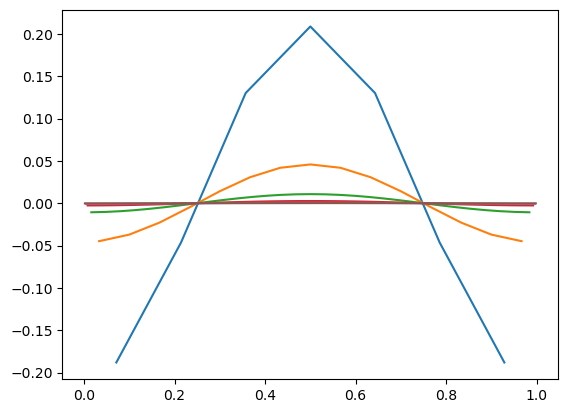

In [5]:
for i in range(6):
    # Define a regular mesh between 0 and 1
    n_nodes = 2 ** (i + 3)
    nodes = np.linspace(0, 1, n_nodes)
    
    # Sample a sinusoidal function on the nodes of the mesh
    sine = np.sin(2 * np.pi * nodes)
    
    # Build the differentiation matrix
    node_spacing = nodes[1] - nodes[0]  # get node spacing
    diff_matrix = build_diff_from_node_to_cell(node_spacing, n_nodes)
    
    # Compute the derivative of the sine on the cell centers
    diff_sine = diff_matrix @ sine
    
    # Build the expected values
    cell_centers = (nodes[1:] + nodes[:-1]) / 2
    expected = 2 * np.pi * np.cos(2 * np.pi * cell_centers)

    # Get the average error
    difference = diff_sine - expected
    average_error = np.abs(difference).mean()

    print(f"Node spacing: {node_spacing}\t Avg error: {average_error}")
    plt.plot(cell_centers, difference)